In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Import data

In [2]:
# df = pd.read_csv(location)
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

# EDA
1. Dataset overview
    - shape
    - info
    - missing values
    - duplicated values
    - head, tail, sample

2. Univariate analysis - Numeric Features
    - Distribution plots (hist and box)
    - Describe
    - Outliers 

3. Univariate analysis - Categorical Features
    - Most common values with percentages
    - Countplot with labels
    - Unique values 

4. Bivariate/Multivariate analysis
    - Numeric-numeric : Correlation matrix, scatterplots (for high correlation), pairplots for smaller features
    - Categorical-categorical : 
    - Numerical-categorical: Boxplot/violin plots

5. Data quality checks
    - Missing values
    - Duplicated values
    - Inconsistencies
    - Feature engineering recommendations


# 1. Dataset Overview

In [3]:
print(f"Rows of data: {df.shape[0]}")
print(f"Columns of data: {df.shape[1]}")

Rows of data: 750000
Columns of data: 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [5]:
# Null Values
print("Null Values:")
df.isnull().sum().reset_index()

Null Values:


,index,0
0,id,0
1,Podcast_Name,0
2,Episode_Title,0
3,Episode_Length_minutes,87093
4,Genre,0
5,Host_Popularity_percentage,0
6,Publication_Day,0
7,Publication_Time,0
8,Guest_Popularity_percentage,146030
9,Number_of_Ads,1


In [6]:
# Duplicated Values
print(f"Duplicated values : {df.duplicated(keep=False).sum()}")
if df.duplicated().sum()>0:
    display(df[df.duplicated(keep=False)].reset_index())

Duplicated values : 0


In [7]:
# Display Data
print("Head")
display(df.head(3))
print("Tail")
display(df.tail(3))
print("Sample")
display(df.sample(3))

Head


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.8,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.9,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531


Tail


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939
749999,749999,Sports Central,Episode 99,24.10,Sports,22.45,Saturday,Night,36.72,0.0,Neutral,11.94439


Sample


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
103741,103741,Market Masters,Episode 42,117.58,Business,78.11,Wednesday,Afternoon,47.14,1.0,Negative,69.30629
611149,611149,Study Sessions,Episode 54,98.94,Education,76.47,Wednesday,Afternoon,27.83,0.0,Negative,80.74206
463676,463676,Home & Living,Episode 18,75.18,Lifestyle,29.18,Monday,Afternoon,75.54,1.0,Neutral,69.13321


In [8]:
# Column Names
print("Column Names:")
for col in df.columns:
    print(col)

Column Names:
id
Podcast_Name
Episode_Title
Episode_Length_minutes
Genre
Host_Popularity_percentage
Publication_Day
Publication_Time
Guest_Popularity_percentage
Number_of_Ads
Episode_Sentiment
Listening_Time_minutes


In [9]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print(f"Numerical Columns: {len(num_cols)}")
for col in num_cols:
    print(col)

print(f"\nCategorical Columns: {len(cat_cols)}")
for col in cat_cols:
    print(col)



Numerical Columns: 6
id
Episode_Length_minutes
Host_Popularity_percentage
Guest_Popularity_percentage
Number_of_Ads
Listening_Time_minutes

Categorical Columns: 6
Podcast_Name
Episode_Title
Genre
Publication_Day
Publication_Time
Episode_Sentiment


# Observations
1. There are 750000 rows of data and 12 columns
2. Out of the 12 feature columns, 6 are categorical and 4 are numerical (id is irrelevant and Listening Time Minutes is the target)
3. There are missing values in the Episode Length and Guest Popularity columns. 
4. We can investigate whether episode length is MCAR or related to the podcast, or any other feature
5. We can assume that Guest Popularity is only applicable where there are guests, however will investigate later on

# 2. Univariate Analysis - Numerical

In [10]:
def numeric_analysis(df,col):

    # Plot Hist and Box plots
    fig,axs = plt.subplots(1,2,figsize=(10,3))
    axs[0].set_title(f"{col} histplot")
    sns.histplot(df,x=col,ax=axs[0],kde=True)
    axs[1].set_title(f"{col} boxplot")
    sns.boxplot(df,x=col,ax=axs[1])
    plt.tight_layout()
    plt.show()

    # Describe the statistics
    display(df[col].describe().to_frame().style.background_gradient(cmap='coolwarm'))
    
    # Identify all outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    if len(outliers) > 0:
        print("Outliers:")
        display(outliers)
    else:
        print("No outliers")


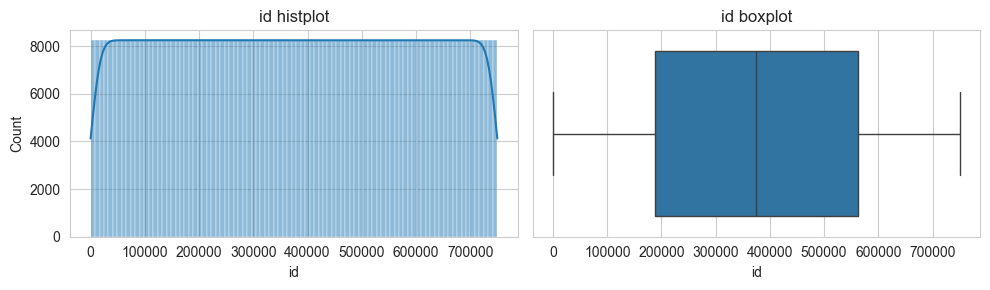

,id
count,750000.000000
mean,374999.500000
std,216506.495284
min,0.000000
25%,187499.750000
50%,374999.500000
75%,562499.250000
max,749999.000000


No outliers


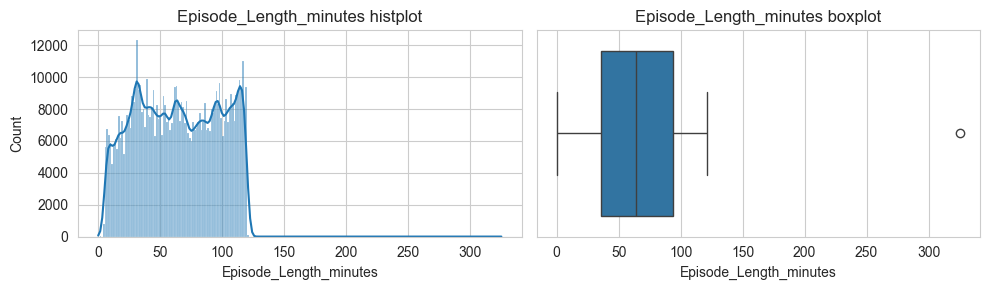

,Episode_Length_minutes
count,662907.000000
mean,64.504738
std,32.969603
min,0.000000
25%,35.730000
50%,63.840000
75%,94.070000
max,325.240000


Outliers:


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
101637,101637,Home & Living,Episode 16,325.24,Lifestyle,50.69,Tuesday,Afternoon,15.01,0.0,Positive,64.31981


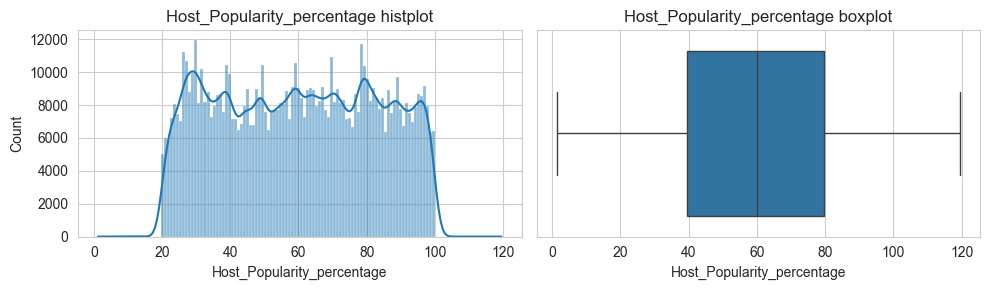

,Host_Popularity_percentage
count,750000.000000
mean,59.859901
std,22.873098
min,1.300000
25%,39.410000
50%,60.050000
75%,79.530000
max,119.460000


No outliers


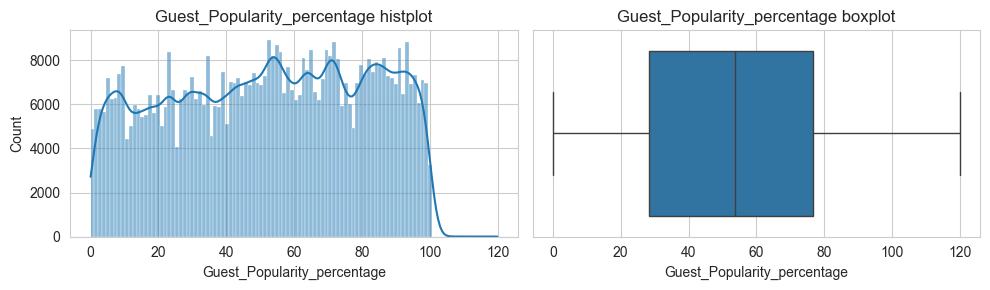

,Guest_Popularity_percentage
count,603970.000000
mean,52.236449
std,28.451241
min,0.000000
25%,28.380000
50%,53.580000
75%,76.600000
max,119.910000


No outliers


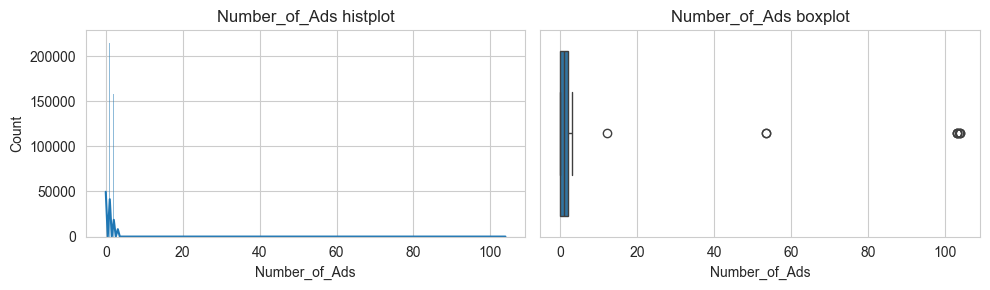

,Number_of_Ads
count,749999.000000
mean,1.348855
std,1.151130
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,103.910000


Outliers:


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
211159,211159,Wellness Wave,Episode 83,64.83,Health,48.46,Sunday,Evening,NaN,53.37,Positive,50.44892
283606,283606,Health Hour,Episode 15,109.93,Health,67.81,Sunday,Morning,77.90,103.91,Neutral,103.89696
436577,436577,Sports Central,Episode 64,115.25,Sports,28.58,Saturday,Afternoon,23.65,103.00,Neutral,103.12686
495919,495919,Comedy Corner,Episode 79,64.83,Comedy,48.37,Saturday,Evening,NaN,53.42,Neutral,50.44892
537705,537705,Sound Waves,Episode 64,112.27,Music,28.95,Saturday,Morning,10.15,103.75,Neutral,103.12686
567235,567235,Detective Diaries,Episode 21,16.13,True Crime,49.11,Tuesday,Evening,43.17,12.00,Positive,6.49000
602553,602553,Sound Waves,Episode 53,112.27,Music,28.19,Tuesday,Morning,23.15,103.25,Neutral,103.12686
672139,672139,Sound Waves,Episode 35,115.74,Music,28.95,Tuesday,Afternoon,23.50,103.25,Neutral,103.12686
683147,683147,Crime Chronicles,Episode 15,109.93,True Crime,59.66,Tuesday,Evening,77.91,103.88,Neutral,103.89696


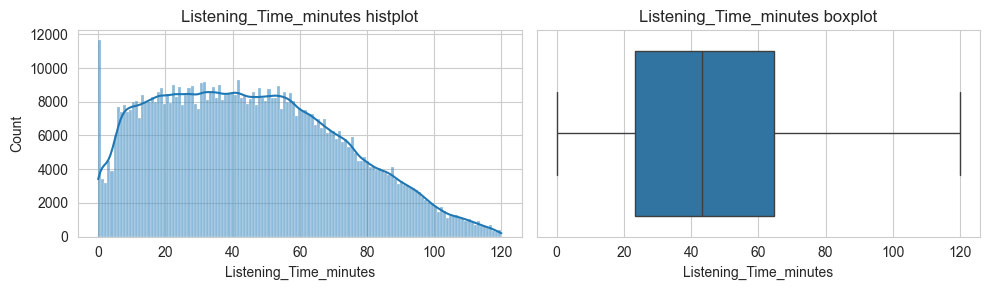

,Listening_Time_minutes
count,750000.000000
mean,45.437406
std,27.138306
min,0.000000
25%,23.178350
50%,43.379460
75%,64.811580
max,119.970000


No outliers


In [11]:
for col in num_cols:
    numeric_analysis(df,col)

<Axes: xlabel='Number_of_Ads', ylabel='count'>

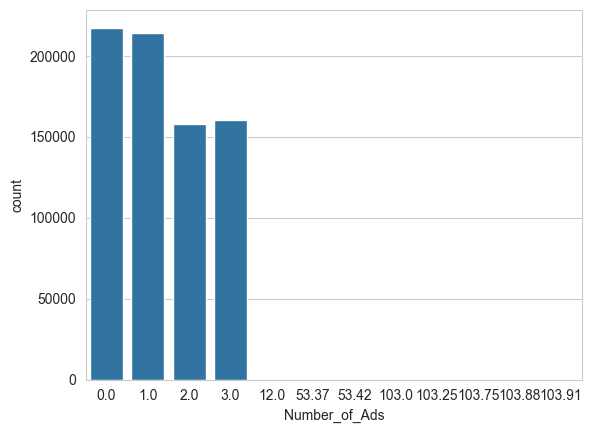

In [12]:
sns.countplot(df,x='Number_of_Ads')

# Observations
1. There are multiple outliers in some of the features
- For Home and Living Episode 16, this looks to be an error. Better to replace with the average for the episode length
- There are multiple outliers for number of ads which probably represent real data. Clip to a maximum of 4
2. Binning for listening time?

# 3. Univariate Analysis - Categorical Analysis

In [13]:
def categorical_analysis(df,col):
    # Count Plot with labels
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].set_title(f"{col} count plot")
    plot = sns.countplot(df,x=col,ax=axs[0], hue=col, palette='cool')
    
    # Add count/percentage labels to each bar
    total = len(df[col].dropna())
    for container in plot.containers:
        for bar in container:
            height = bar.get_height()
            count = int(height)
            percentage = f'{100 * height/total:.1f}%'
            plot.annotate(f'{count}\n({percentage})',
                          xy=(bar.get_x() + bar.get_width()/2, height),
                          xytext=(0, 3),  # 3 points vertical offset
                          textcoords="offset points",
                          ha='center', va='bottom',
                          fontsize=9)

    # Value Counts into pie chart
    value_counts = df[col].value_counts()
    axs[1].pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('cool', len(value_counts)))
    axs[1].set_title('Percentage Distribution')

    plt.tight_layout()
    plt.show()

    print(f"Unique counts: {df[col].nunique()}")

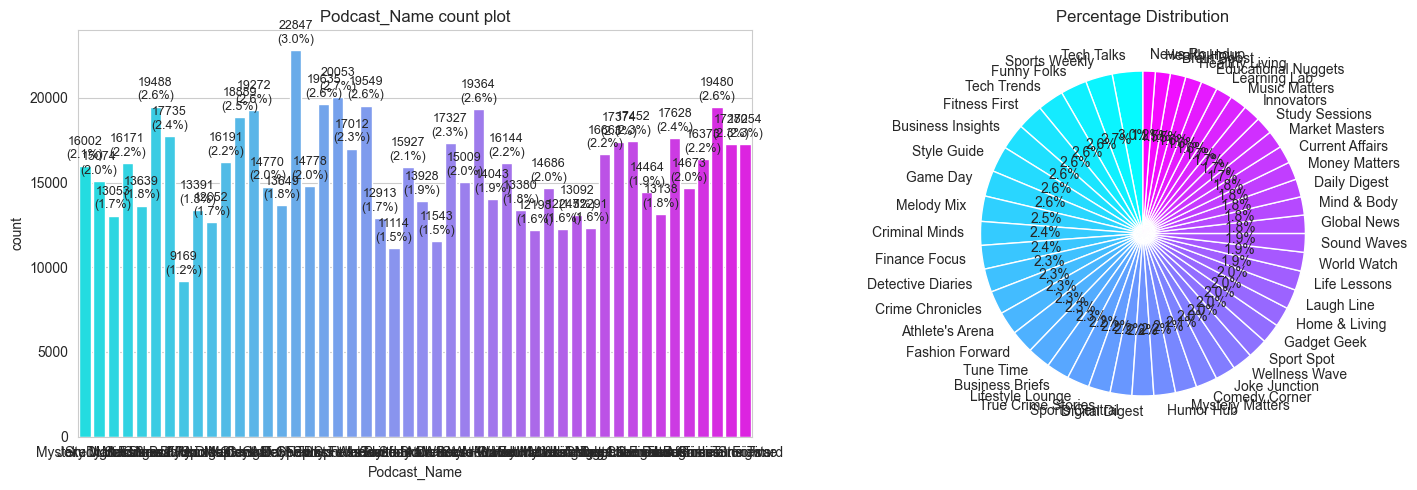

Unique counts: 48


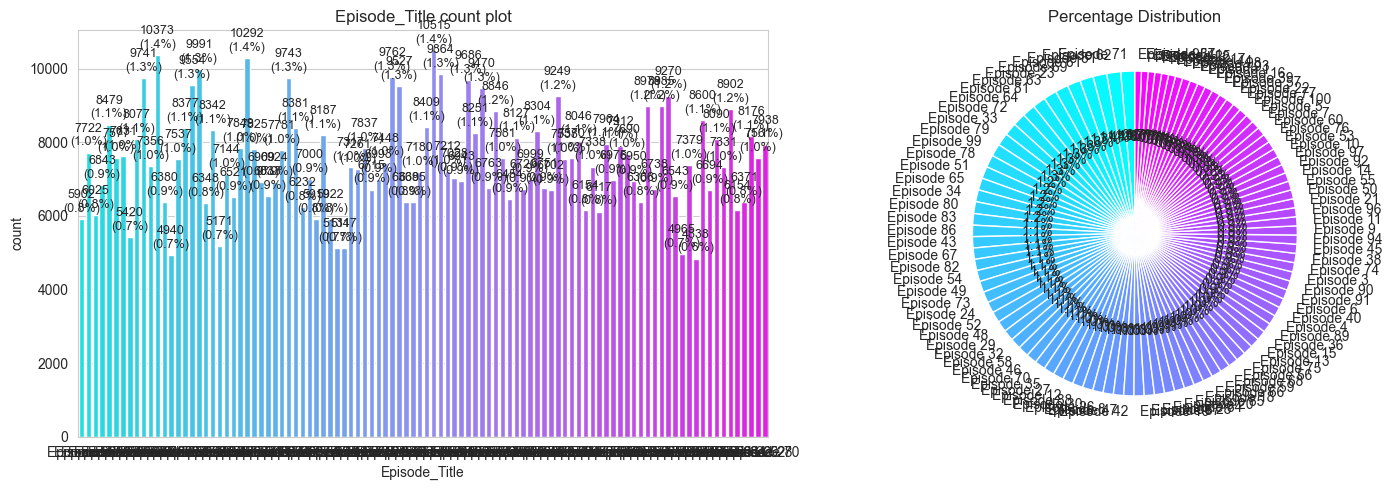

Unique counts: 100


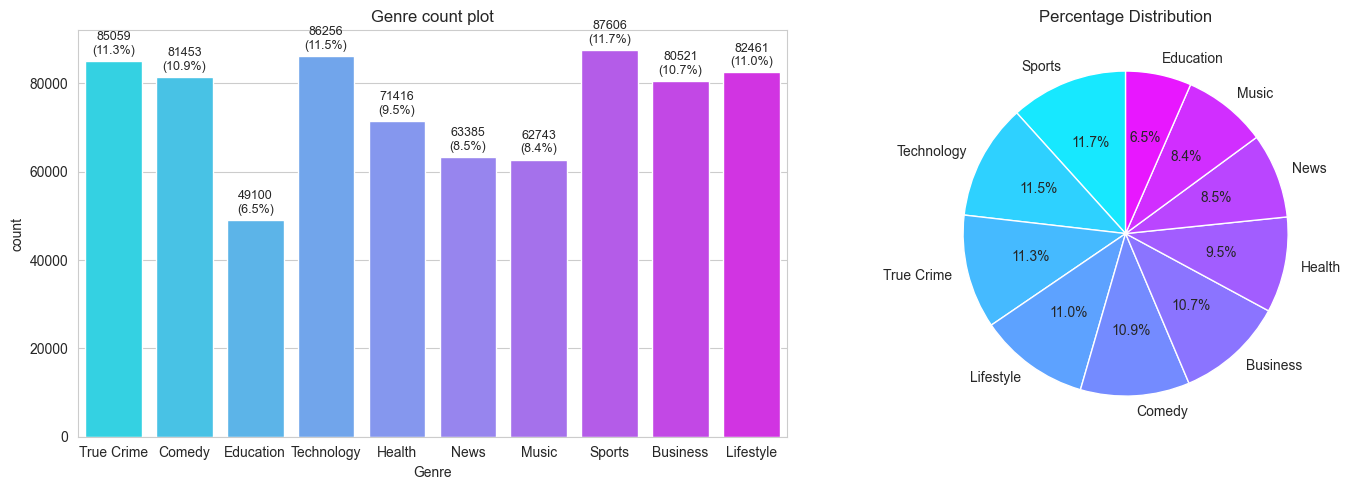

Unique counts: 10


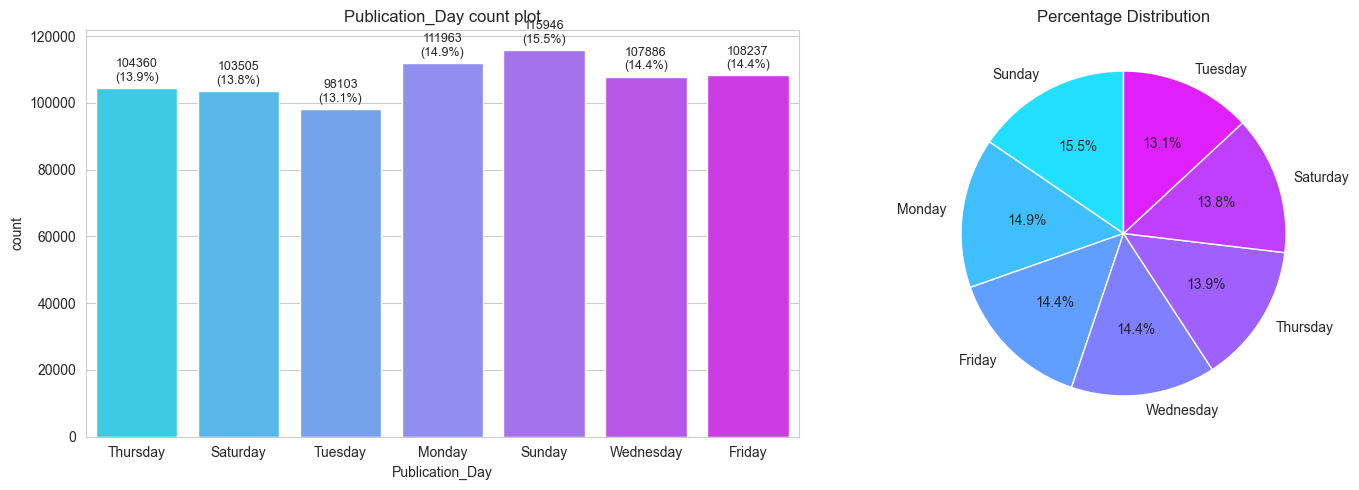

Unique counts: 7


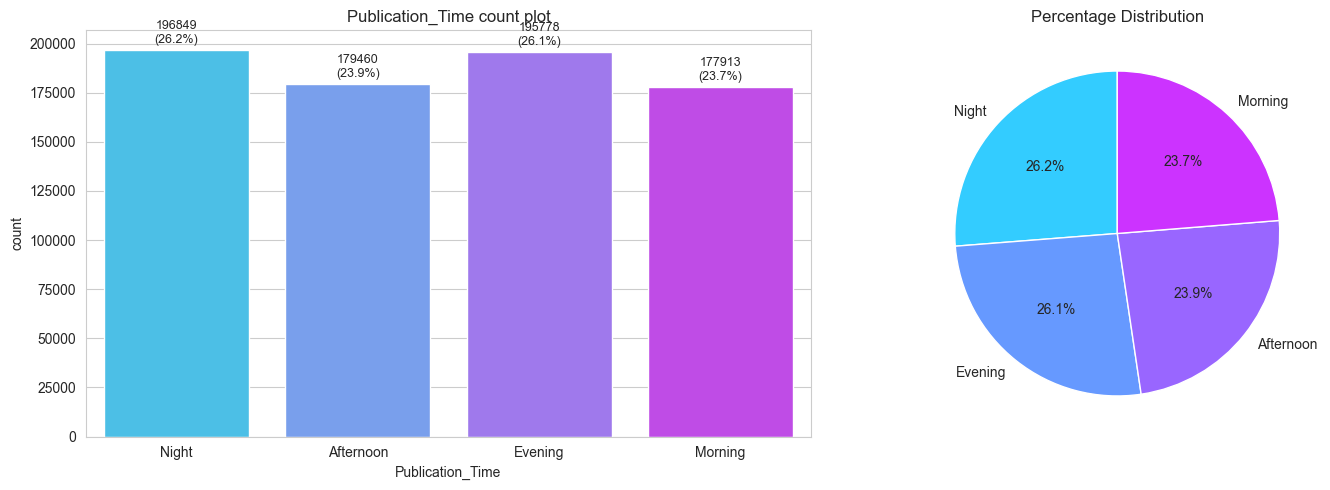

Unique counts: 4


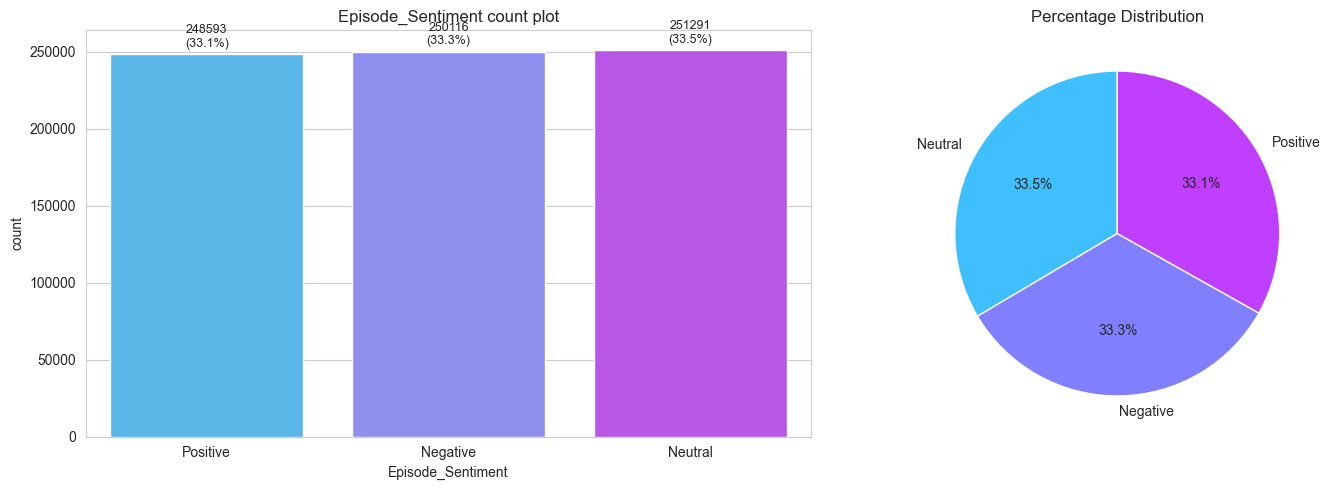

Unique counts: 3


In [14]:
for col in cat_cols:
    categorical_analysis(df,col)

# Observations
1. Podcast name can be label encoded as there are many different podcasts (48 unique values)
2. Episode number should be converted to numeric
3. Others can be handled natively with CatBoostRegressor


# 4a. Multivariate Analysis - Numeric

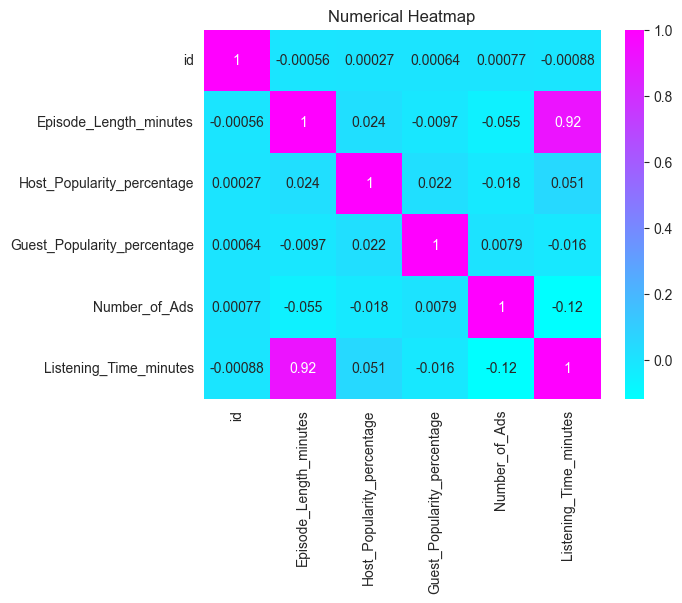

In [15]:
fig = plt.Figure(figsize=(10,10))
plt.title("Numerical Heatmap")
sns.heatmap(df[num_cols].corr(),annot=True,cmap='cool')
plt.show()

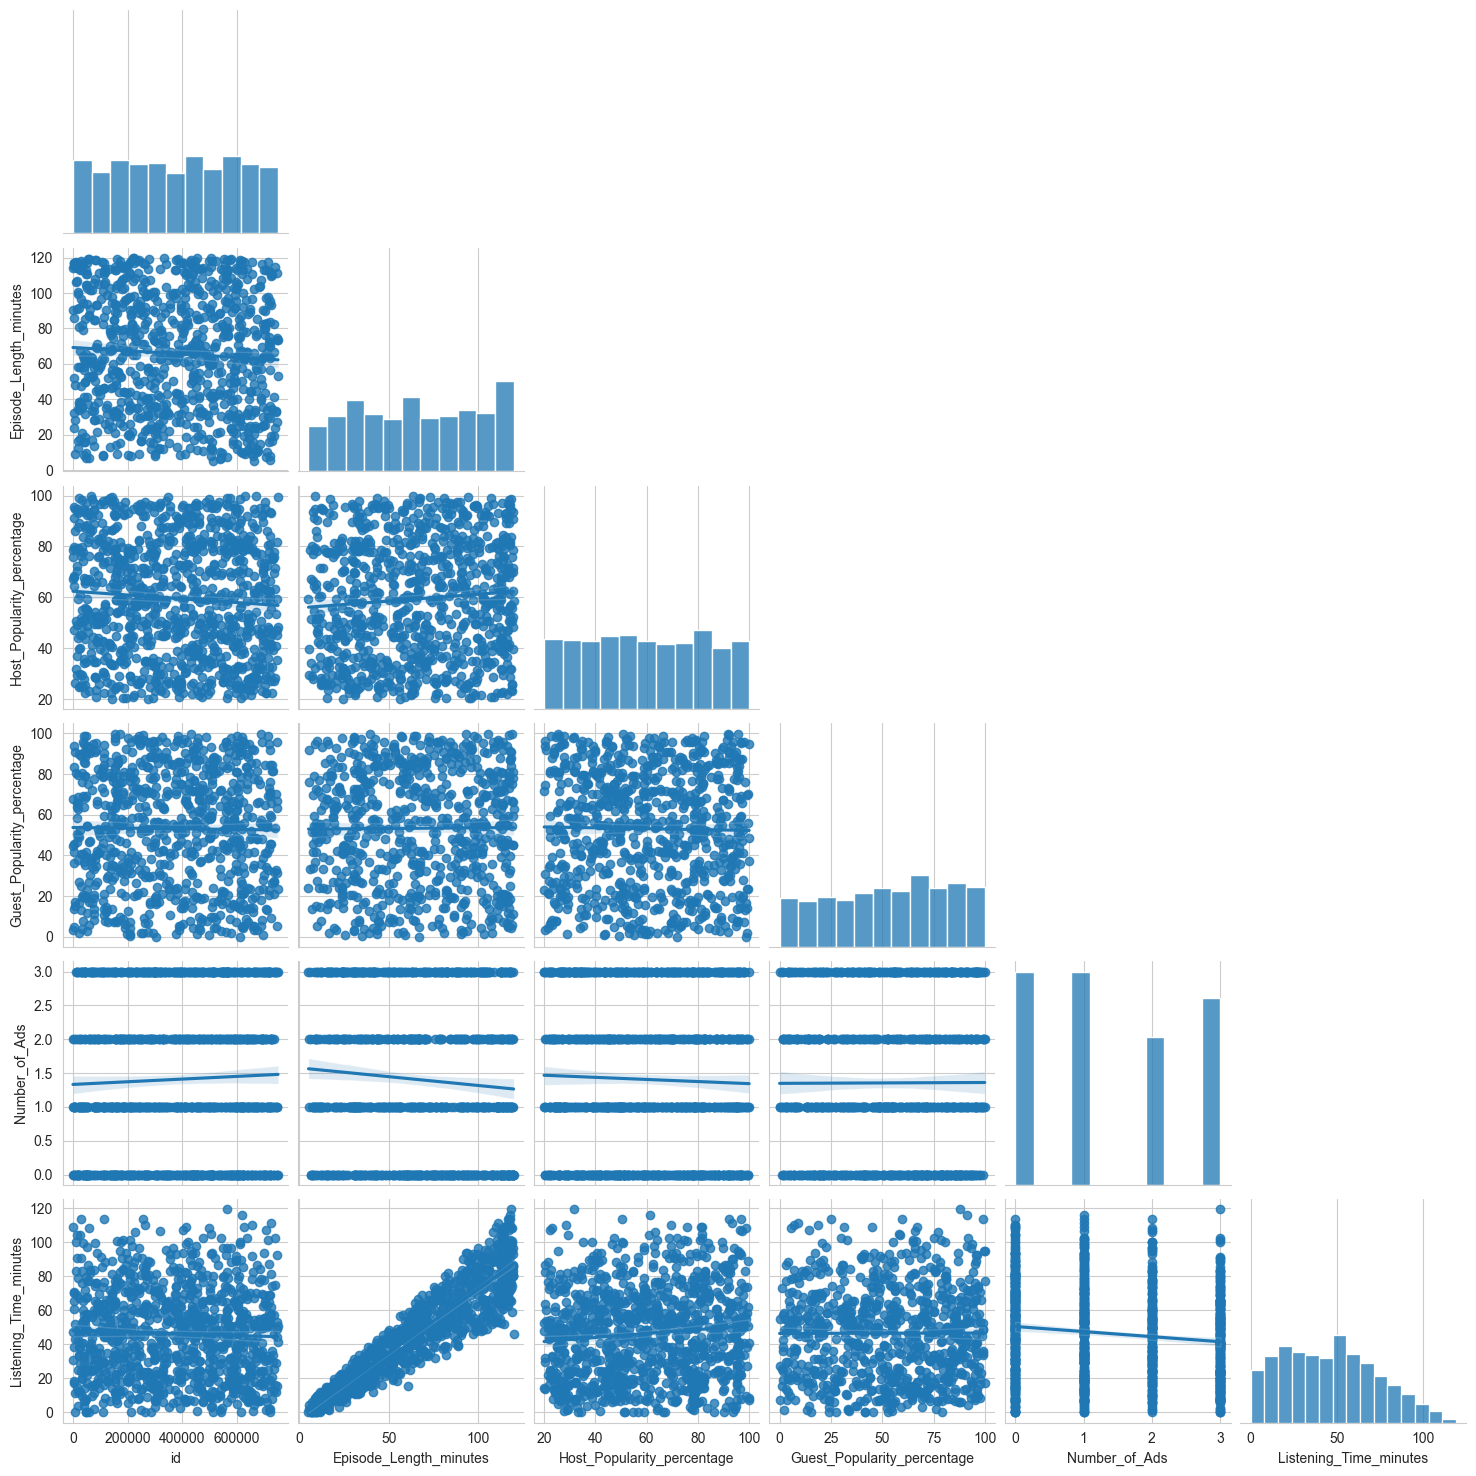

In [16]:
sns.pairplot(df.sample(1000, random_state=43), kind='reg', height=2.5, corner=True) 
plt.show()


# Observations
1. Only Episode length has a strong correlation to listening time
2. There are weak correlations between non-target numeric values- low risk of multi-collinearity 

# 4b. Multivariate Analysis : Categorical Columns

1. Chi Squared Test
- The null hypothesis H0 is that there is no relationship between two categorical values --> This forms the expected value 
- The alternate hypothesis H1 is that there is a relationship between two categorical values
- The formula measures the squared difference between the expected value and the observed value
- The p value is then used to determine the test results
- p<=0.05 --> null hypothesis are rejected
- p>0.05 --> null hypothesis interpretations are not rejected (but also not definitely accepted)

In [17]:
from scipy.stats import chi2_contingency

In [18]:
def chi_square_test(df, cat_cols, correction=True, alpha=0.05):

    results = []
    
    for i, col1 in enumerate(cat_cols):
        for col2 in cat_cols[i+1:]:
            # Creates contingency Table
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # Skip if either column has only 1 unique value (no variation)
            if len(contingency_table) == 1 or len(contingency_table.columns) == 1:
                continue
                
            chi2, p_value, dof, expected = chi2_contingency(
                contingency_table, 
                correction=correction
            )
            
            # Calculate Cramer's V (measure of association strength)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * min(contingency_table.shape[0]-1, contingency_table.shape[1]-1)))
            
            results.append({
                'Feature1': col1,
                'Feature2': col2,
                'Chi2': chi2,
                'p_value': p_value,
                'dof': dof,
                'Cramers_V': cramers_v,
                'Significant': p_value < alpha
            })
    
    return pd.DataFrame(results)

# Usage
chi_results = chi_square_test(df, cat_cols)
    


In [19]:
df_chi = chi_square_test(df,cat_cols)

print("Not Correlated:")
display(df_chi[df_chi['p_value'] > 0.05])

print("\nCorrelated:")
display(df_chi[df_chi['p_value'] <= 0.05])



Not Correlated:


,Feature1,Feature2,Chi2,p_value,dof,Cramers_V,Significant



Correlated:


,Feature1,Feature2,Chi2,p_value,dof,Cramers_V,Significant
0,Podcast_Name,Episode_Title,2.223358e+04,0.000000e+00,4653,0.025115,True
1,Podcast_Name,Genre,6.719155e+06,0.000000e+00,423,0.997713,True
2,Podcast_Name,Publication_Day,1.916307e+03,1.658142e-240,282,0.020636,True
3,Podcast_Name,Publication_Time,1.179511e+03,2.154964e-163,141,0.022896,True
4,Podcast_Name,Episode_Sentiment,8.848601e+02,7.428701e-129,94,0.024288,True
5,Episode_Title,Genre,1.104245e+04,0.000000e+00,891,0.040446,True
6,Episode_Title,Publication_Day,2.267107e+03,2.311971e-193,594,0.022446,True
7,Episode_Title,Publication_Time,1.034744e+03,2.613911e-82,297,0.021445,True
8,Episode_Title,Episode_Sentiment,1.110862e+03,7.293837e-127,198,0.027213,True
9,Genre,Publication_Day,8.750340e+02,1.190066e-148,54,0.013945,True


# Observations
1. All categorical variables have some statistically significant correlation or dependence

# 4c. Multivariate Analysis : Categorical - Numerical

In [20]:
df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

<Axes: >

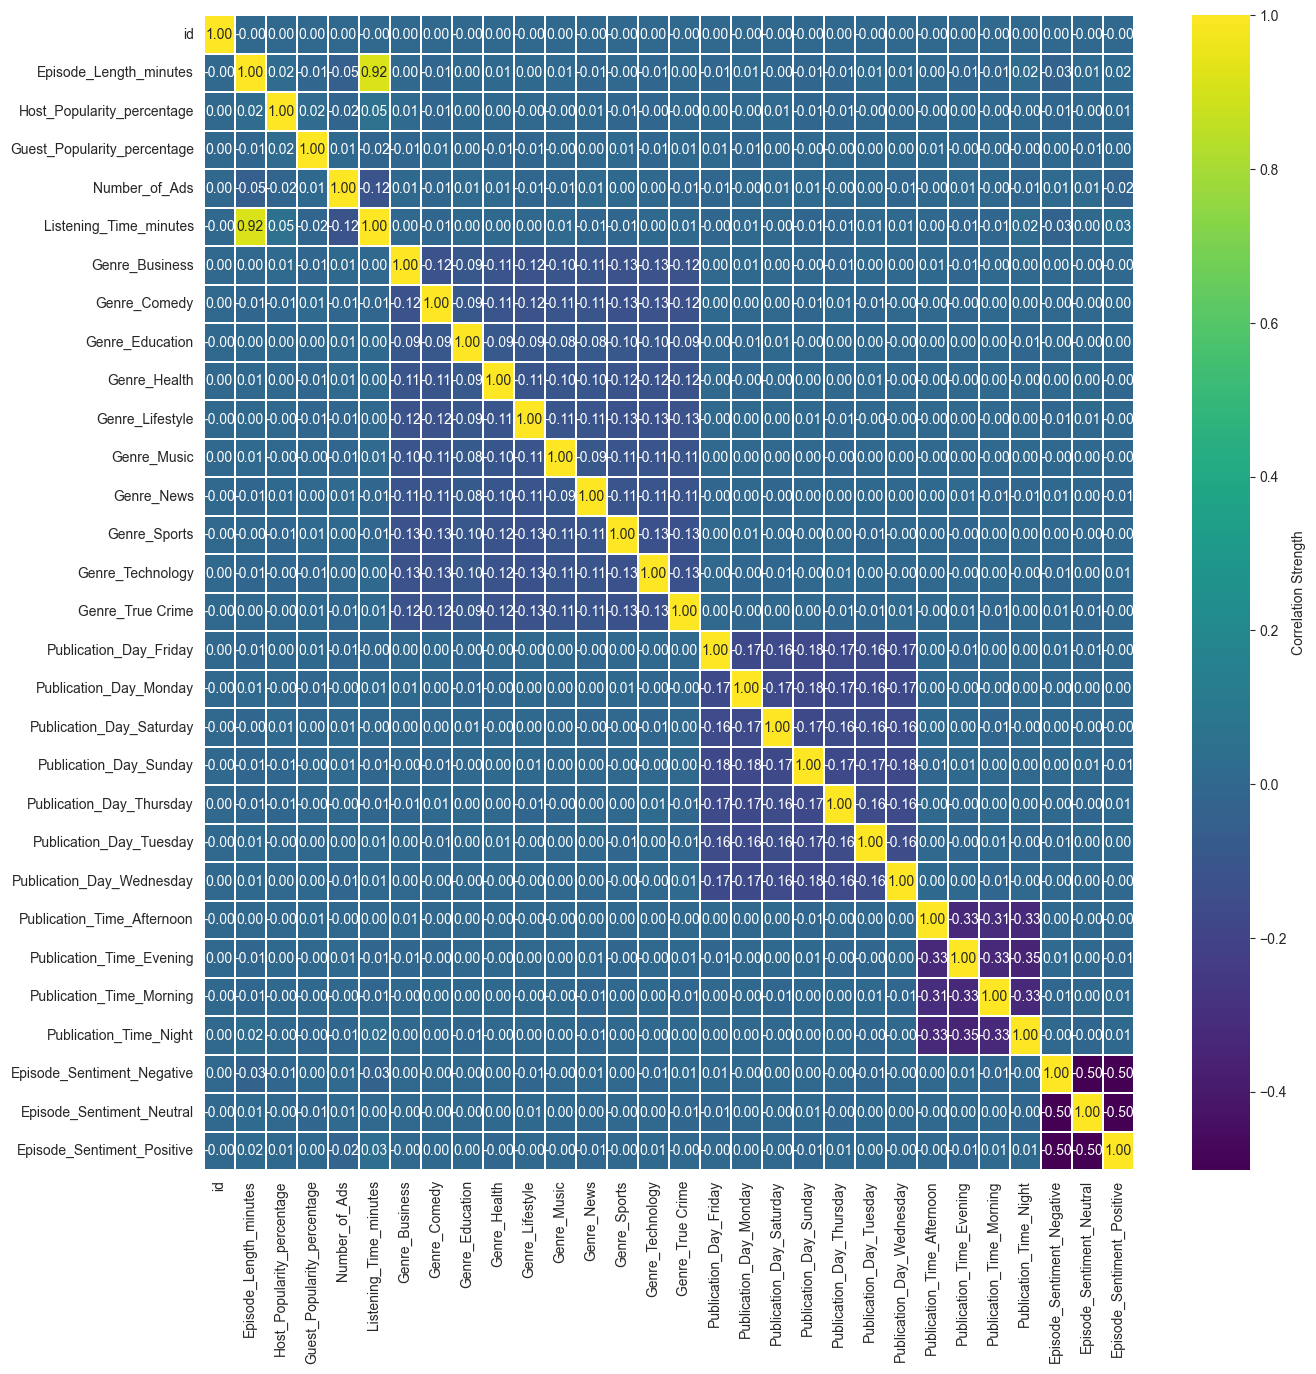

In [21]:
cols_to_exclude =['Podcast_Name','Episode_Title']
encoded_df = pd.get_dummies(df.drop(columns=cols_to_exclude),drop_first =False)
df_corr = encoded_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cmap='viridis', fmt='.2f', annot=True,linewidths=0.3,cbar=True, cbar_kws={'label': 'Correlation Strength'}
)

# Observations
1. Nothing significant here

# 5. Data Quality Checks

In [22]:
import missingno as msno

<Axes: >

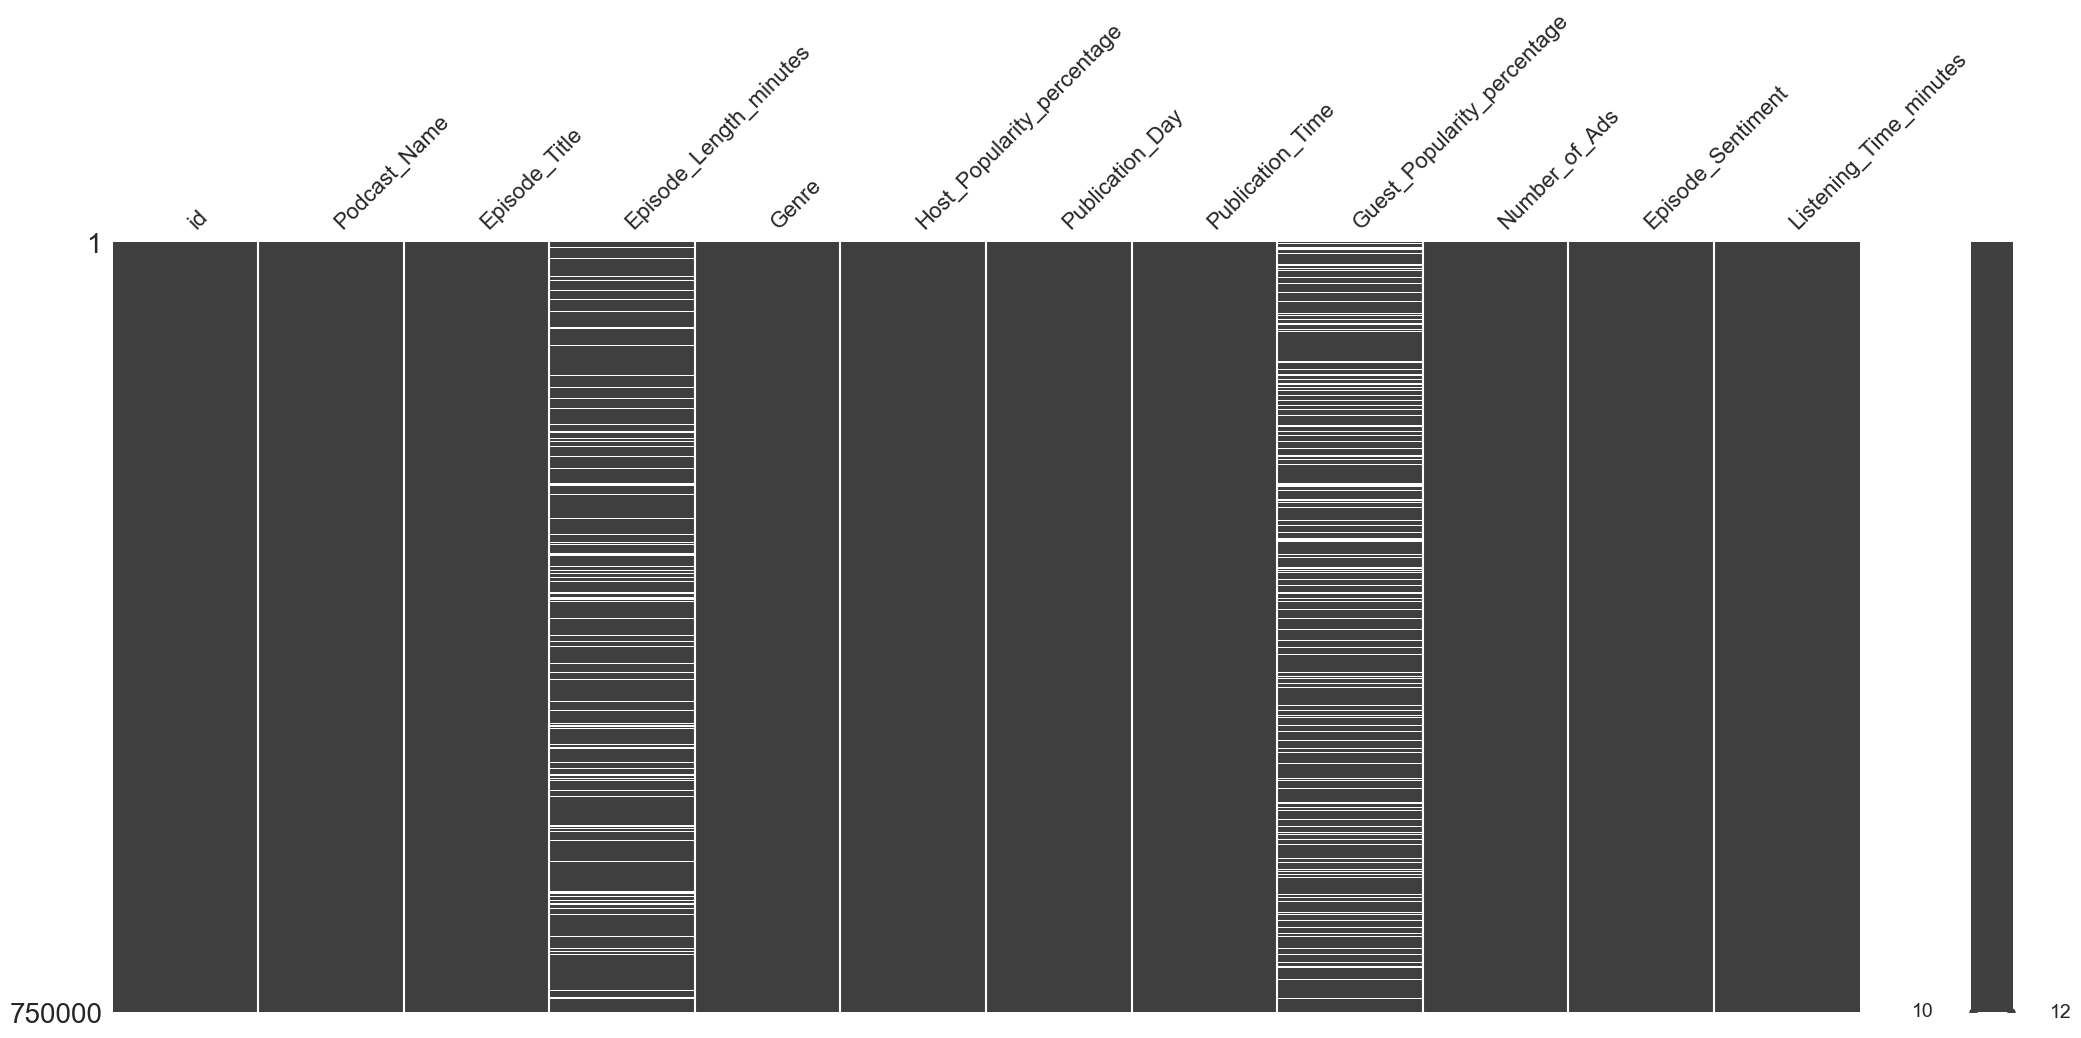

In [23]:
msno.matrix(df)

<Axes: >

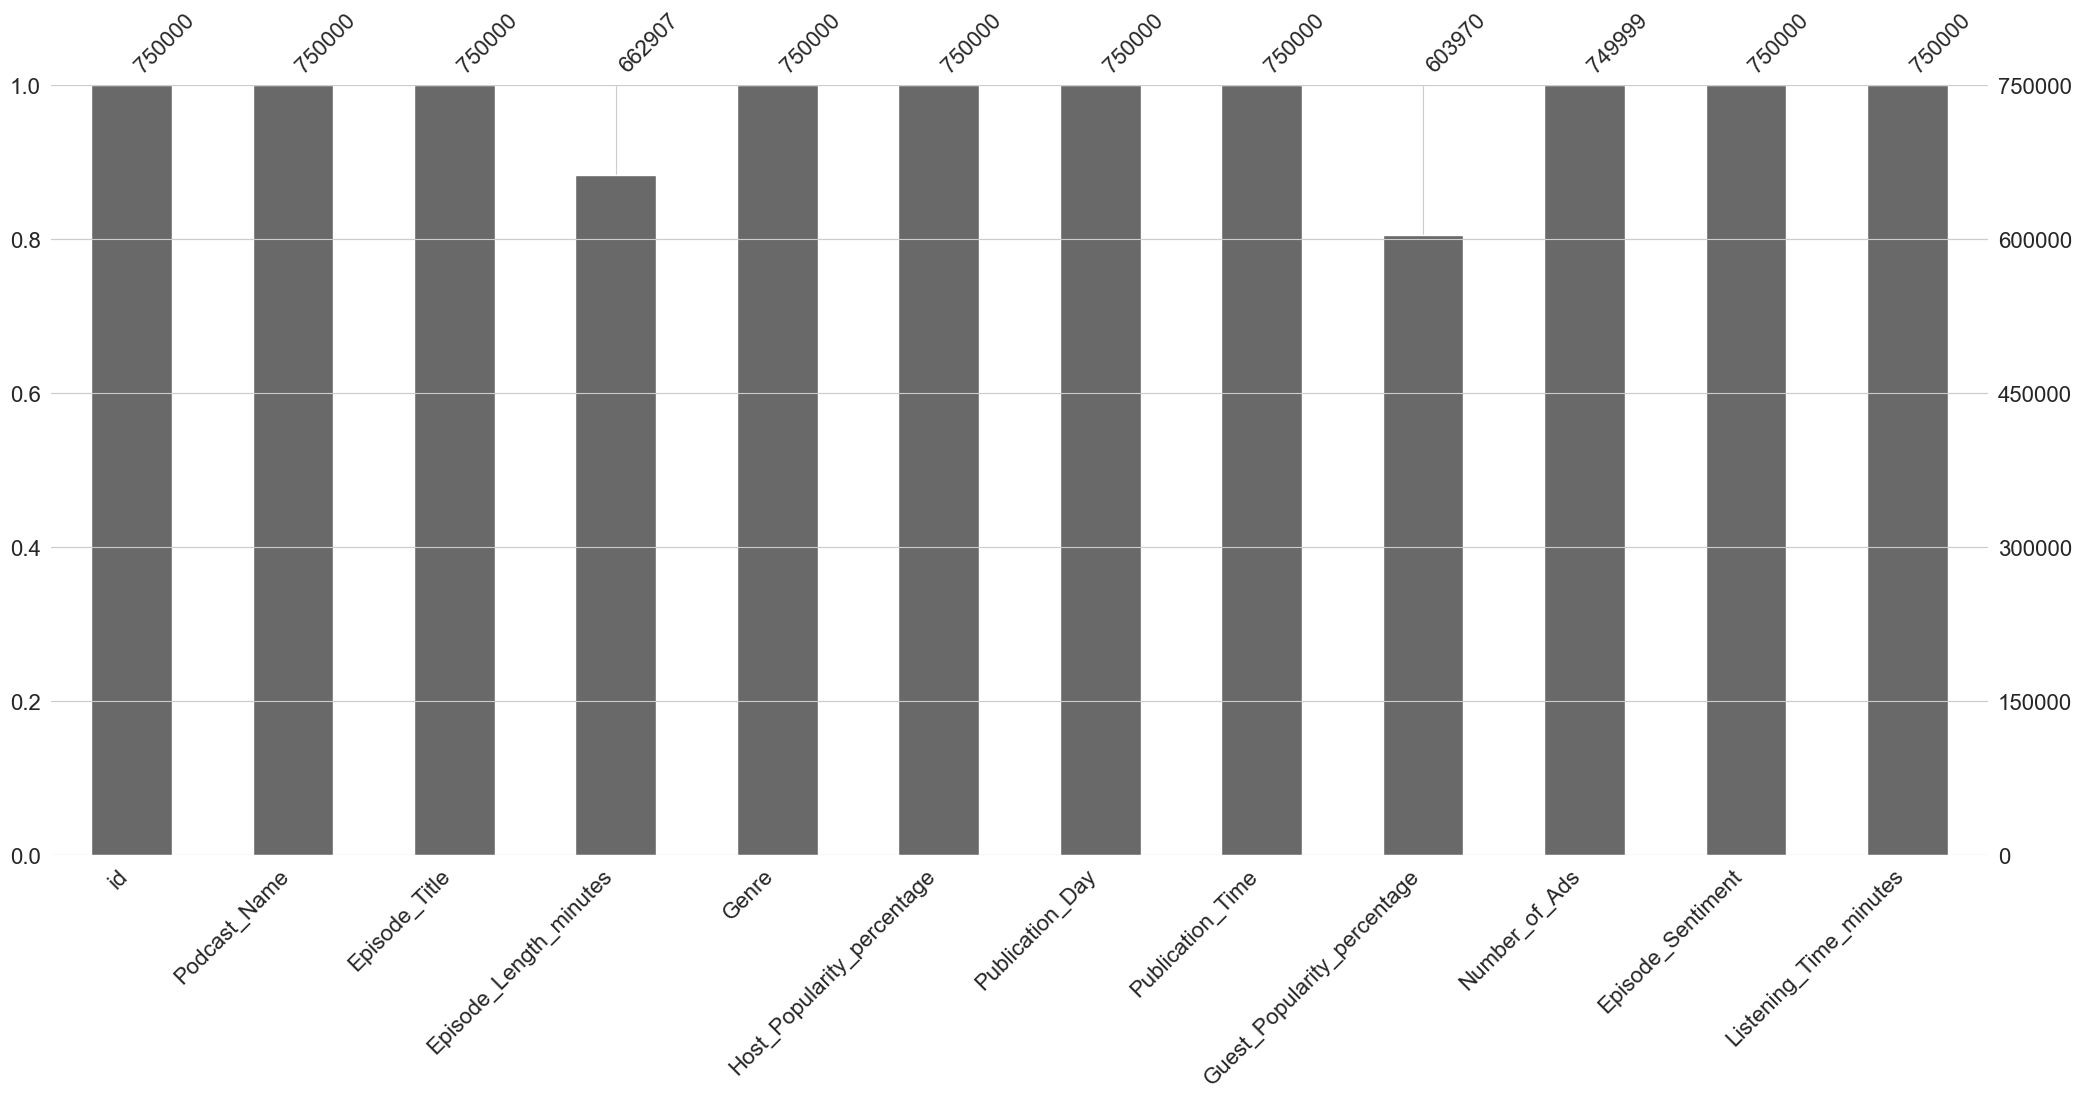

In [24]:
msno.bar(df)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761
29,29,Health Hour,Episode 38,NaN,Health,45.97,Saturday,Evening,15.43,1.0,Negative,25.38384


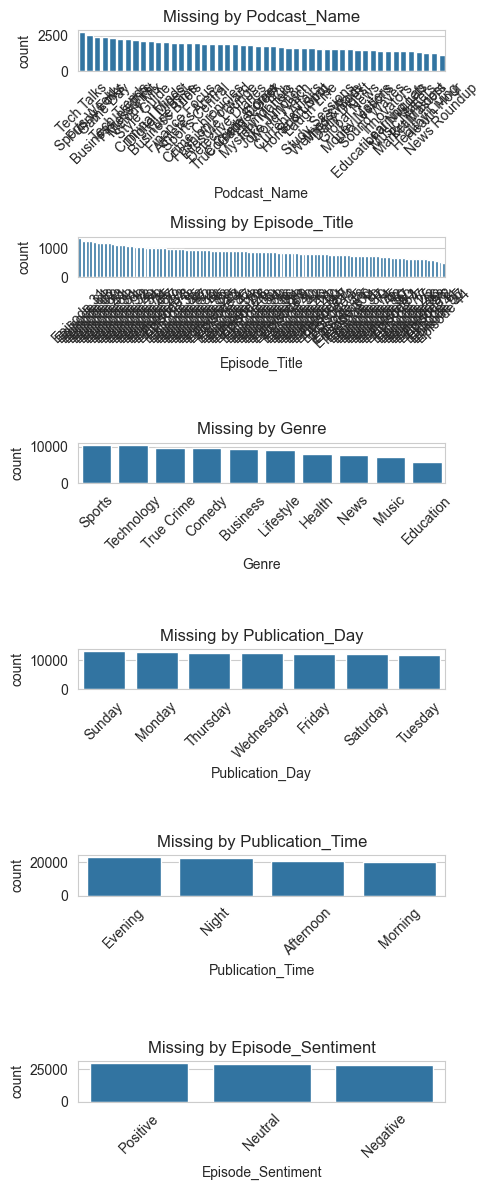

In [25]:
missing_df = df[df['Episode_Length_minutes'].isnull()]

display(missing_df.head(3))
fig,axs = plt.subplots(len(cat_cols),figsize=(5,2*len(cat_cols)))
for i,col in enumerate(cat_cols):
    axs[i].set_title(f'Missing by {col}')
    sns.countplot(missing_df,x=col, ax=axs[i], order=missing_df[col].value_counts().index)
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [26]:
df_test.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

# Observations
1. For episode length there doesn't seem to be an observable pattern per category. We can impute this as the mean for each podcast 
2. Guest popularity is likely null when there are no guests. Create a feature for guest or no guest

# Feature Engineering recommendations
1. Clip number of ads to be a maximum of 4
2. No binning for episode length as ordinality may be lost when training
3. Convert episode number to numeric
4. Label encode podcast name (may be done in pipeline)
5. Impute mean for the podcast where there are missing values for episode length
6. Create a feature called 'no_guests' to indicate there were no guests, then leave the missing values as is

# Other 
1. Fix the Home and Living Episode 16 episode length to be average

In [27]:
df.loc[df['id'] == 101637, 'Episode_Length_minutes'] = df[df['Podcast_Name'] == "Home & Living"]['Episode_Length_minutes'].mean()

# Preprocessing Function

In [28]:
df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [29]:
def preprocessing(df):
    X = df.copy()
    # clip 4 ads
    X['Number_of_Ads'] = X['Number_of_Ads'].clip(upper=4)
    
    # Convert Episode Title to a number
    X['Episode_Title_Number'] = X['Episode_Title'].str[8:].astype(int)

    # Impute mean values for missing episode lengths (mean of the podcast)
    # Create a series mapping each podcast to the average episode length
    podcast_average_lengths = X.groupby(by='Podcast_Name')['Episode_Length_minutes'].transform('mean')
    X['Episode_Length_minutes'] = X['Episode_Length_minutes'].fillna(podcast_average_lengths)

    # Create a feature called no_guests
    X['no_guests'] = X['Guest_Popularity_percentage'].isnull()

    X.drop(columns=['id','Episode_Title'],inplace=True)
      
    return X

In [30]:
# df = pd.read_csv(location)
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [31]:
df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

# Model Training
1. Split data
2. Use CatBoostRegressor
3. Optuna for optimization

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error


In [51]:
X = df.drop(columns='Listening_Time_minutes')
X = preprocessing(X)
y = df['Listening_Time_minutes']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [55]:
cat_features = X_train.select_dtypes(include=['object', 'category', 'bool']).columns
for col in cat_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_train[col].astype('category')

cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]
print(cat_features_indices)
params = {
    'categorical_feature' : cat_features_indices,
    'verbose': 0
}

model = LGBMRegressor(**params)

[0, 2, 4, 5, 8, 10]


In [56]:
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_preds)
print(rmse)

c:\Python311\Lib\site-packages\lightgbm\basic.py:2118: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.



13.147319215918458


In [36]:
import optuna
from sklearn.model_selection import cross_val_score

In [37]:
X_train.dtypes

Podcast_Name                    object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Episode_Title_Number             int32
no_guests                         bool
dtype: object

In [65]:
def objective(trial):
    params = {
            'objective':'regression',
            'metric':'rmse',
            'num_leaves':278,
            'learning_rate':trial.suggest_float('learning_rate',0.01,0.3),
            'n_estimators':1378
        }
      
    model = LGBMRegressor(**params)

    scores = cross_val_score(model, X_train,y_train, cv=2, scoring='neg_root_mean_squared_error', n_jobs=1)
    return -scores.mean()

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42)  
)
study.optimize(objective,n_trials = 100)

[I 2025-04-15 21:13:53,203] A new study created in memory with name: no-name-d09304fd-20db-4342-80fe-f237e6ddbe66
[I 2025-04-15 21:14:33,761] Trial 0 finished with value: 13.31729849887355 and parameters: {'learning_rate': 0.11861663446573512}. Best is trial 0 with value: 13.31729849887355.
[I 2025-04-15 21:15:12,901] Trial 1 finished with value: 13.956377388670564 and parameters: {'learning_rate': 0.28570714885887566}. Best is trial 0 with value: 13.31729849887355.
[W 2025-04-15 21:15:54,997] Trial 2 failed with parameters: {'learning_rate': 0.22227824312530747} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\JEFF\AppData\Local\Temp\ipykernel_20984\1940432908.py", line 12, in objective
    scores = cross_val_score(model, X_train,y_train, cv=2, scoring='neg_root_mean_square

KeyboardInterrupt: 

In [61]:
optuna.visualization.plot_optimization_history(study)

In [62]:
optuna.visualization.plot_param_importances(study)

In [64]:
best_params = study.best_params
print(best_params)

{'num_leaves': 278, 'learning_rate': 0.022148200999622943, 'n_estimators': 1378}


In [66]:
final_params = {
        **best_params,
        'verbose': 0,
        'random_seed': 42,
        'loss_function': 'RMSE',
        'task_type': 'GPU',
        'early_stopping_rounds':15,
        'cat_features': cat_features_indices
}


In [67]:

model = LGBMRegressor(**best_params)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_preds)
print(rmse)

13.163873647182646
